# **Traffic Sign AI**

In [60]:
# Imports
%load_ext tensorboard
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image

In [2]:
# Metadaten für das Programm 
data = []
labels = []
height = 30
width = 30
channels = 3
classes = 43
input_size = height * width * channels

In [3]:
# Verkehrsschilder 
sign_label = ["20 km/h","30 km/h","50 km/h","60 km/h","70 km/h","80 km/h","80 km/h Aufhebung","100 km/h",
          "120 km/h", "Überholverbot", "LKW-Überholverbot", "Vorfahrt", "Vorfahrtsstraße","Vorfahrt gewähren", 
          "Stop","Fahrverbot","Verbot für Lastwagen","Einfahrt verboten","Gefahr","Linkskurve","Rechtskurve","Doppelkurve",
          "Bodenwelle","Schleudergefahr","Verengung","Baustelle","Ampel","Zebrastreifen","Kinder","Fahrradweg","Schneegefahr",
          "Wildwechsel","Unbegrenzte Geschwindigkeit","Rechtsabbiegen", "Linksabbiegen", "Geradeaus fahren", "Geradeaus oder Rechtsabbiegen",
          "Geradeaus oder Linksabbiegen", "Hindernis rechts umfahren", " Hindernis links umfahren", "Kreisverkehr", "Ende des Überholverbotes",
          "Ende des LKW-Überholverbotes"]

In [4]:
# Einlesen der Bild-Datein
for i in range(classes):
    path = r"C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\{0}/".format(i)
    print(path)
    Class = os.listdir(path)
    for a in Class:
        try:
            image = cv2.imread(path + a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")

C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\0/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\1/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\2/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\3/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\4/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\5/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\6/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\7/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\8/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\9/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\10/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\11/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\12/
C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Train\13/
C:

Gesamtzahl der Bilder: 39209


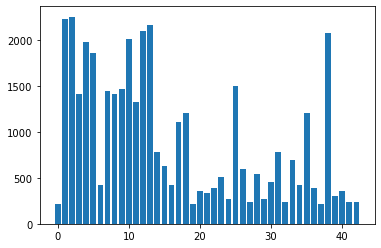

In [49]:
# Zusammenfassen aller Bilder in einem Array
Cells = np.array(data)
labels = np.array(labels)
print("Gesamtzahl der Bilder:",len(Cells))

# Darstellen der Bias des Datensets
from collections import Counter
c = Counter(labels)
plt.bar(c.keys(), c.values())
plt.show()

In [50]:
# Vermischen der Daten und Labels
s = np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells = Cells[s]
labels = labels[s]

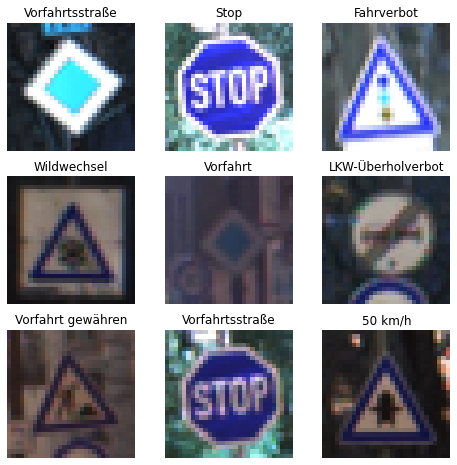

In [68]:
# Beispiele aus dem Dataset
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Cells[i])
    plt.title(sign_label[labels[i]])
    plt.axis("off")
plt.show()

In [57]:
# Aufteilen der Daten in ein Trainings- und ein Validierungsset
(x_train,x_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

print("Größe des Trainingsets:    ",len(x_train))
print("Größe des Validierungssets:",len(x_val))

Größe des Trainingsets:     31368
Größe des Validierungssets: 7841


In [58]:
# Die Labels mit einem One-Hot-Encoder kategorisieren
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [61]:
# Aufstellen des Netztes und Trainieren des Netztes

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Kompilieren des Models 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

epochs = 20
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

model.fit(X_train, 
          y_train, 
          batch_size=32, 
          epochs=epochs,
          validation_data=(X_val, y_val), 
          callbacks = tensorboard_callback)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)         

In [64]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 60396), started 0:02:31 ago. (Use '!kill 60396' to kill it.)

In [63]:
# Laden der Test-Daten 

y_test=pd.read_csv(r'C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Test.csv')
names =y_test['Path'].to_numpy()
y_test =y_test['ClassId'].values

data=[]
for f in names:
    image=cv2.imread(r'C:\Users\z0045vws\Desktop\TH_Koeln_Projekt_Adversarial_Attack\Test/'+f.replace('Test', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))
    
X_test=np.array(data)
X_test = X_test.astype('float32')/255

pred = model.predict(X_test)
print(len(pred))

AttributeError: 'numpy.int32' object has no attribute 'replace'